# Problem Formualtion 
- In this example we want to find out what factors affect most the GDP in Malta and predict GDP with a MLR model

## Installing Packages

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
#%matplotlib inline


## Loading the Data 

In [196]:
df = pd.read_excel("MLR_DATA.xlsx")

In [197]:
df = df.set_index('Year')

In [198]:
print(df.shape)

(22, 4)


In [199]:
df.head()

,Arrivals,Investments,Infaltion,GDP
Year,,,,
2002,1365393,95723,0.0293,-0.0117
2003,1297341,106061,0.0219,0.0257
2004,1301095,166044,0.0130,0.0407
2005,1375383,1221111,0.0279,0.0014
2006,1375708,3402597,0.0301,0.0338


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2002 to 2023
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Arrivals     22 non-null     int64  
 1   Investments  22 non-null     int64  
 2   Infaltion    22 non-null     float64
 3   GDP          22 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 880.0 bytes


In [201]:
df = df.astype({'Arrivals': float, 'Investments': float})

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2002 to 2023
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Arrivals     22 non-null     float64
 1   Investments  22 non-null     float64
 2   Infaltion    22 non-null     float64
 3   GDP          22 non-null     float64
dtypes: float64(4)
memory usage: 880.0 bytes


## Data Processing & Exploratory Data Analysis

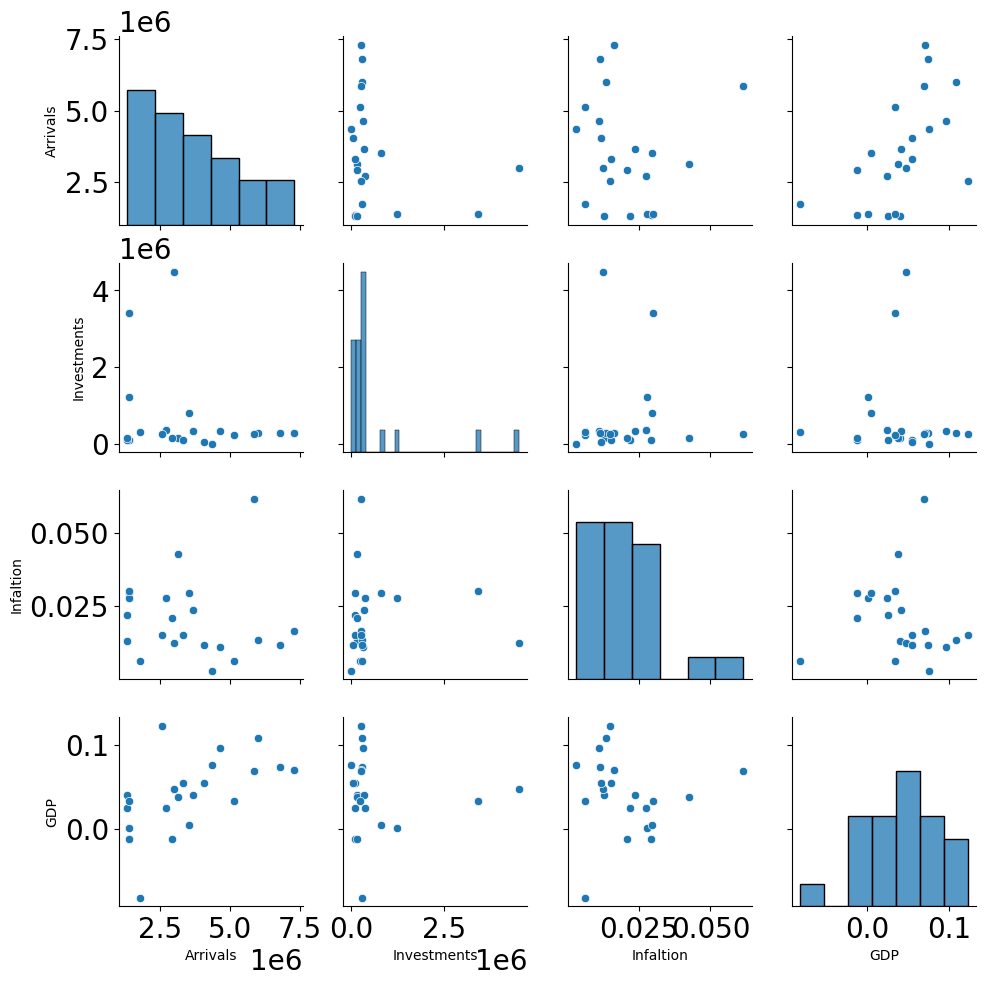

In [203]:
sns.pairplot(df)

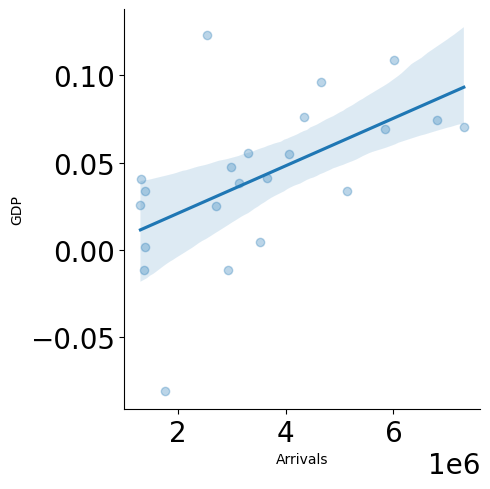

In [204]:
sns.lmplot(x='Arrivals',
        y='GDP',
          data=df,
          scatter_kws={'alpha' : 0.3})

In [205]:
#import yfinance as yf
import pandas as pd
import datetime
#import pandas_datareader as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

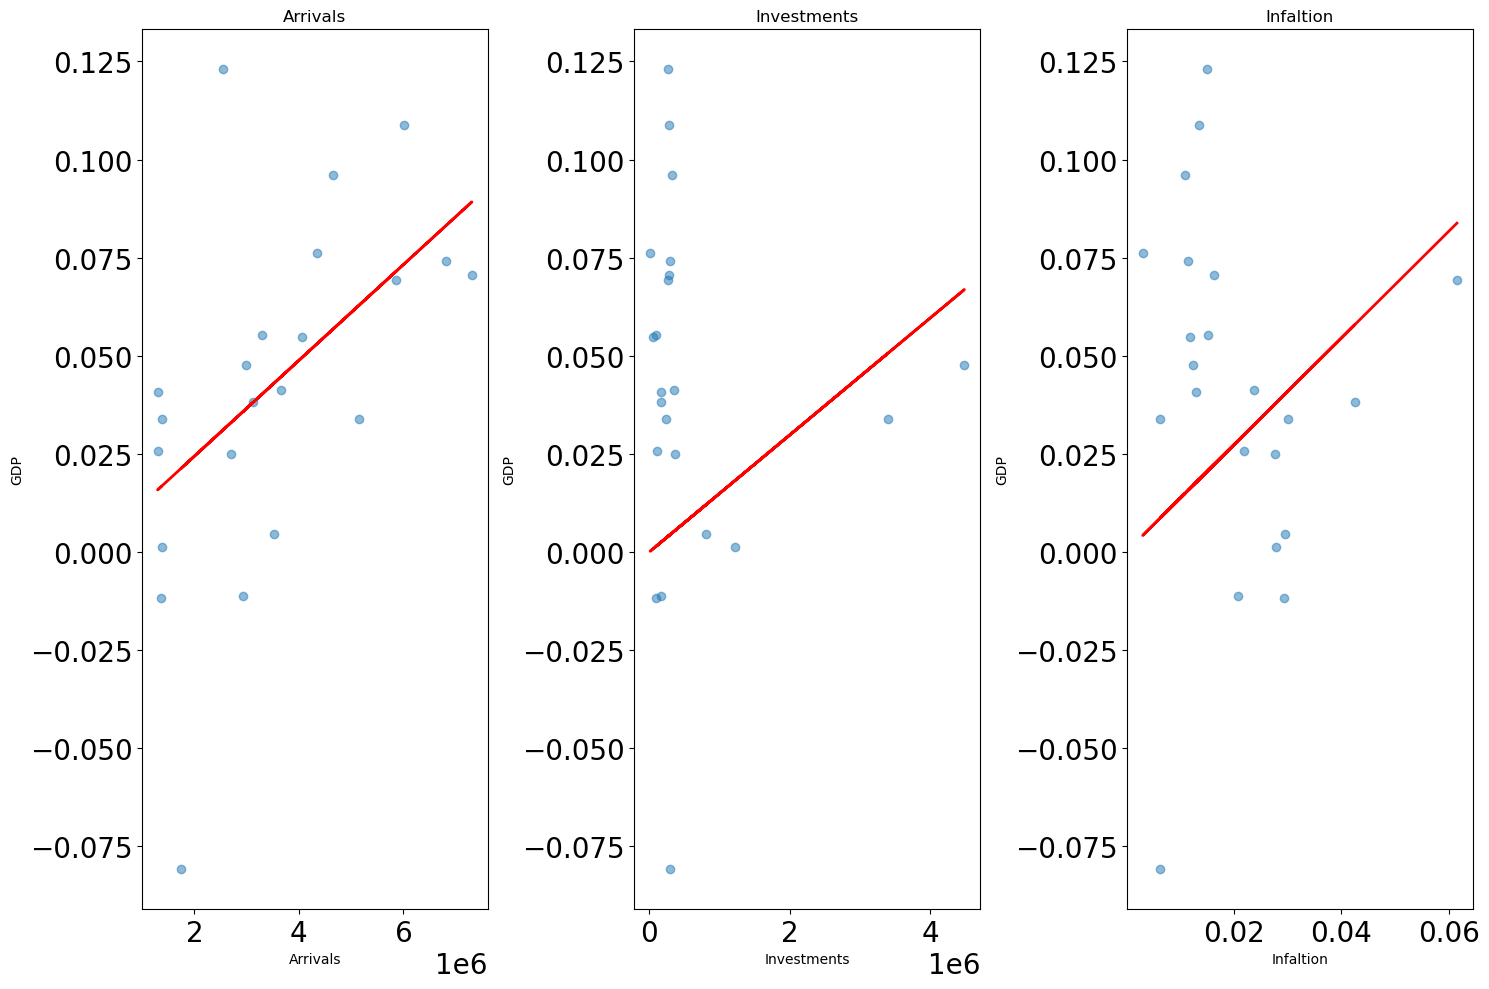

In [206]:
# Determine the number of rows and columns for subplots
X = df[['Arrivals', 'Investments','Infaltion']]
y = df['GDP']
num_features = len(X.columns)
num_rows = math.ceil(num_features / 3)
num_cols = min(num_features, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over the features and create a linear regression plot for each one
for i, feature in enumerate(X.columns):
    # Fit the linear regression model
    X_feature = X[feature]
    model = sm.OLS(y, X_feature)
    results = model.fit()
    
    # Determine the current subplot index
    subplot_index = i % (num_rows * num_cols)
    
    # Plot the observed data and the predicted values
    ax = axes[subplot_index]
    ax.scatter(X_feature, y, alpha=0.5)
    ax.plot(X_feature, results.fittedvalues, color='red', linewidth=2)
    
    # Set the subplot title as the feature name
    ax.set_title(feature)
    
    # Set x and y axis labels
    ax.set_xlabel(feature)
    ax.set_ylabel('GDP')
    
# Hide any extra subplots if the number of features is not a multiple of (num_rows * num_cols)
if num_features < (num_rows * num_cols):
    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()
# Display the plots
plt.show()

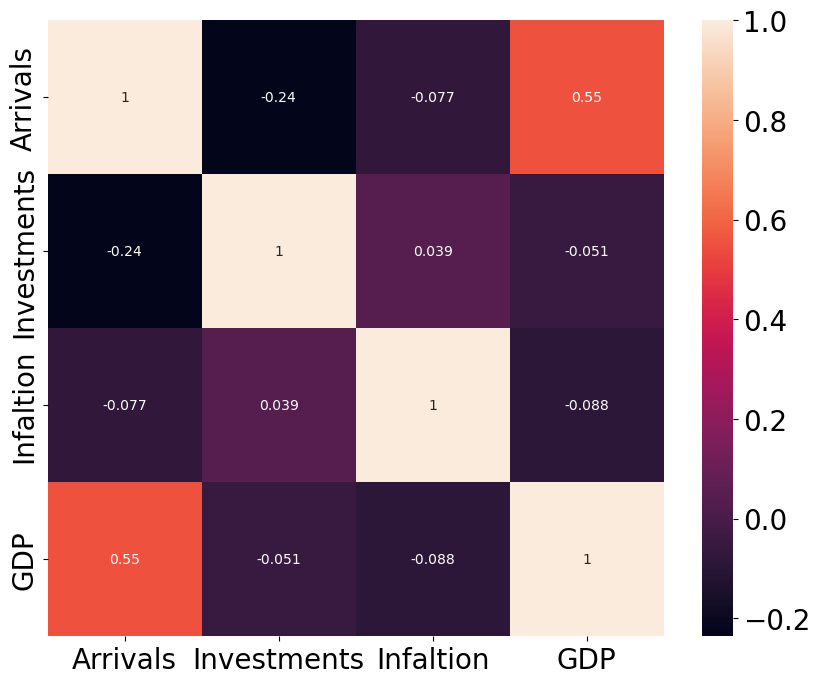

In [207]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, square=True)
# Show the plot
plt.show()

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
#x = df[['Arrivals', 'Investments','Infaltion']]
#x = df['Arrivals']
y = df['GDP']

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [211]:
X_train

,Arrivals,Investments,Infaltion
Year,,,
2006,1375708.0,3402597.0,0.0301
2004,1301095.0,166044.0,0.0130
2019,6808177.0,293246.0,0.0116
2008,2980257.0,4490809.0,0.0125
2009,3124846.0,163225.0,0.0426
2003,1297341.0,106061.0,0.0219
2016,4654371.0,328244.0,0.0110
2002,1365393.0,95723.0,0.0293
2023,5851079.0,271837.0,0.0615


<Axes: xlabel='Year'>

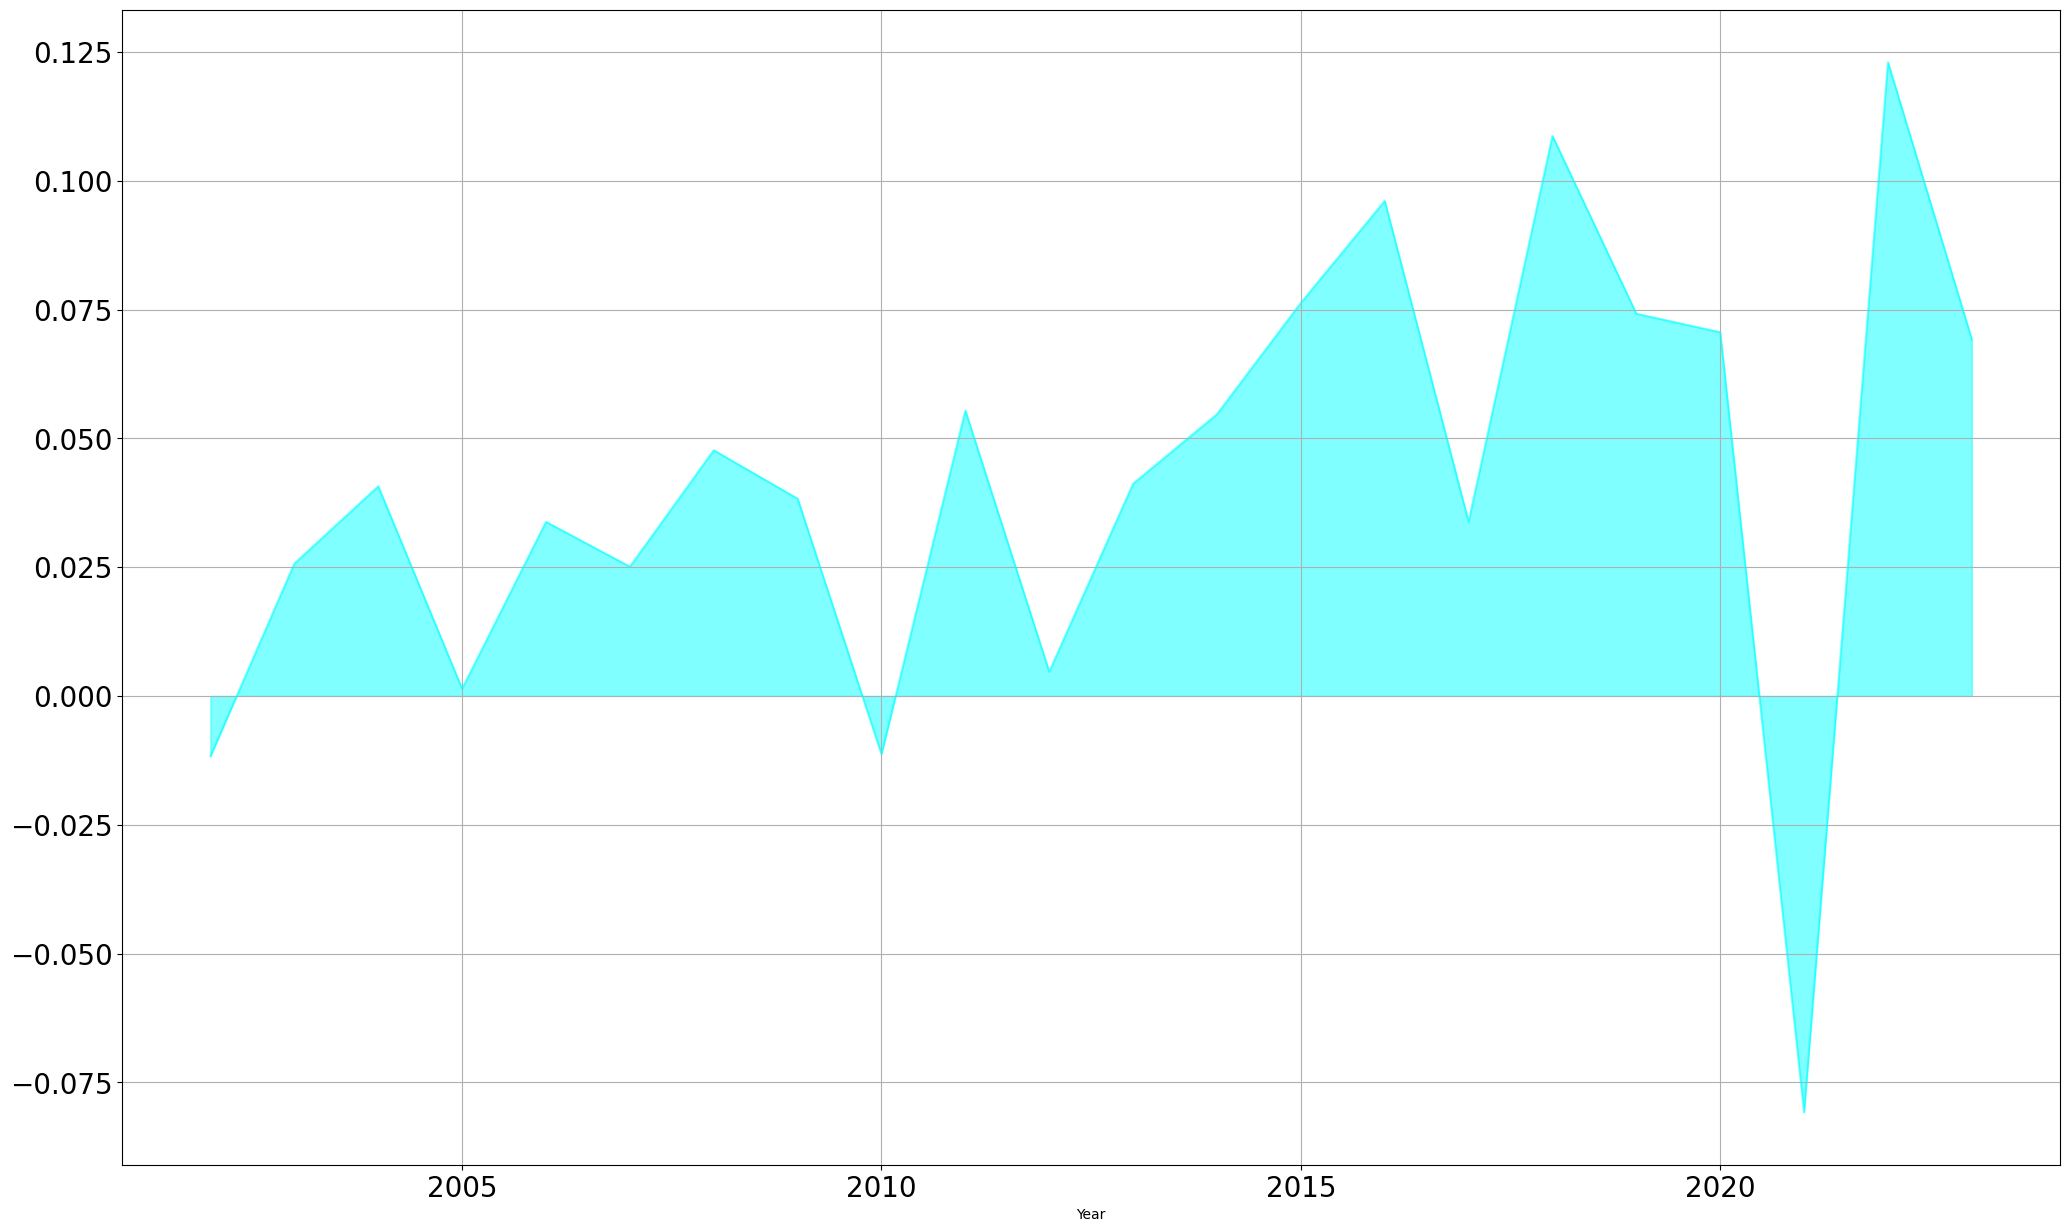

In [212]:
df.GDP.plot(figsize=(25,15), kind='area', legend=False, use_index=True, grid=True, stacked=False, color='aqua')

Text(0.5, 1.0, 'Investments (2000-2023)')

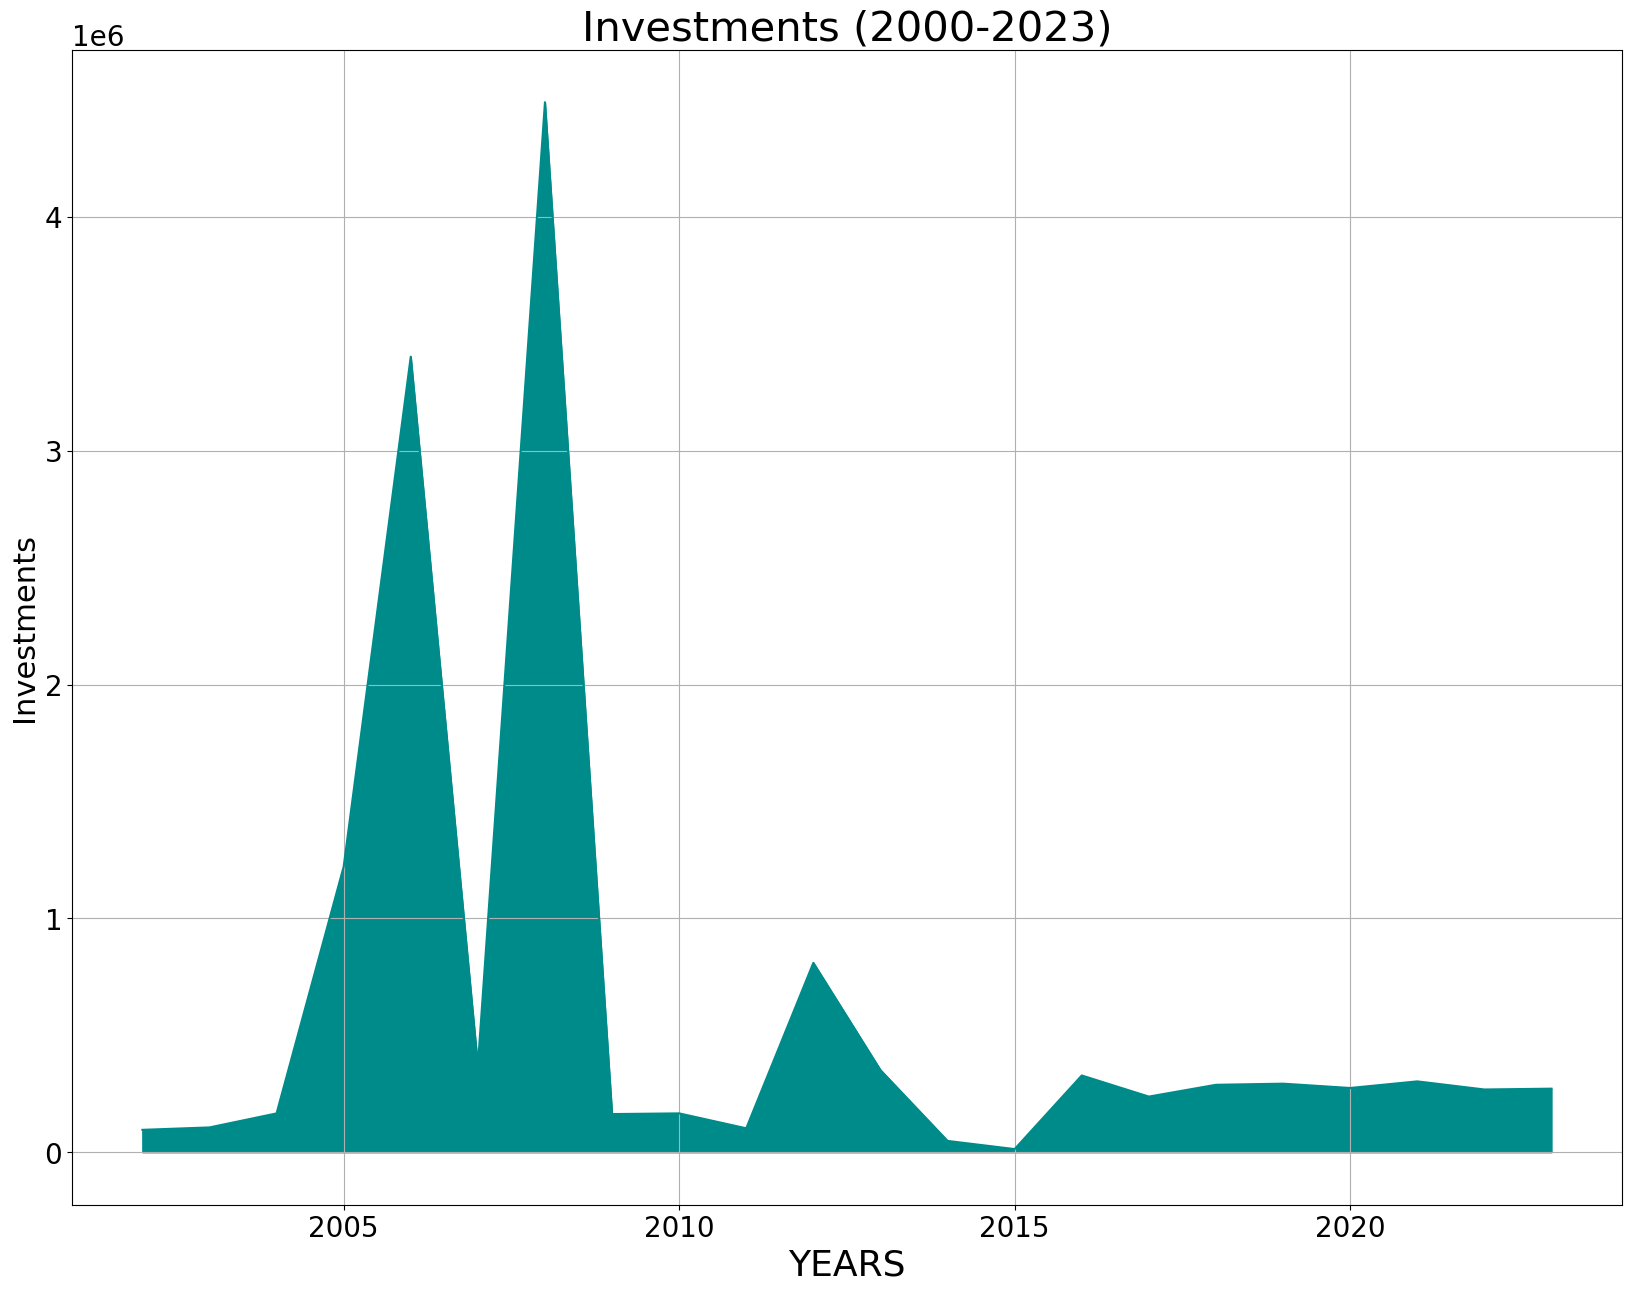

In [213]:
df['Investments'].plot(figsize=(20,15), kind='area', legend=False, use_index=True, grid=True, color='darkcyan')

SIZE = 22
plt.rc('xtick', labelsize=SIZE)                         # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE)                         # fontsize of the tick Y labels 

plt.xlabel('YEARS', size=26)                            # x title label 
plt.ylabel('Investments', size=22)                    # y title label 
plt.title('Investments (2000-2023)',
          size=30)                       

In [214]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [215]:
X=['Arrivals', 'Investments', 'Infaltion']
#X=['Arrivals']

In [216]:
# We create our matrix of regressors (independent variables)
X=df[X]

# We create our dependant variable
y=df.GDP

In [217]:
# We create a linear regression object
lm = LinearRegression()

In [218]:
# We fit our model
lm.fit(X,y)

LinearRegression()

In [219]:
lm.coef_

array([ 1.39978288e-08,  3.46083236e-09, -1.61136408e-01])

In [220]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['coef'])
print(cdf)

                     coef
Arrivals     1.399783e-08
Investments  3.460832e-09
Infaltion   -1.611364e-01


- Foreign Investments is having the gratest impact on the target variable 

# Predictions for the traget variable 

# Analysing the Residuals
- The Residual supose to be random, meaning to follow a normal distribution 

/var/folders/jy/7cv65s915dn3vt3v0kbn97q80000gn/T/ipykernel_1409/885427777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10, kde=True)


<Axes: xlabel='GDP', ylabel='Density'>

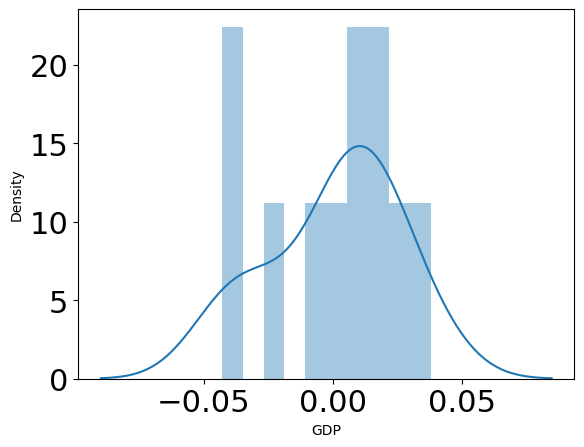

In [221]:
sns.distplot(residuals, bins=10, kde=True)

In [222]:
# From the stats models we built our linear model.
model=lm.fit(X,y)

result = sm.ols(formula="y ~ X", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.784
Date:                Wed, 15 May 2024   Prob (F-statistic):             0.0706
Time:                        21:34:27   Log-Likelihood:                 41.686
No. Observations:                  22   AIC:                            -75.37
Df Residuals:                      18   BIC:                            -71.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0064      0.026     -0.252      0.8

In [223]:
p=lm.predict(X)

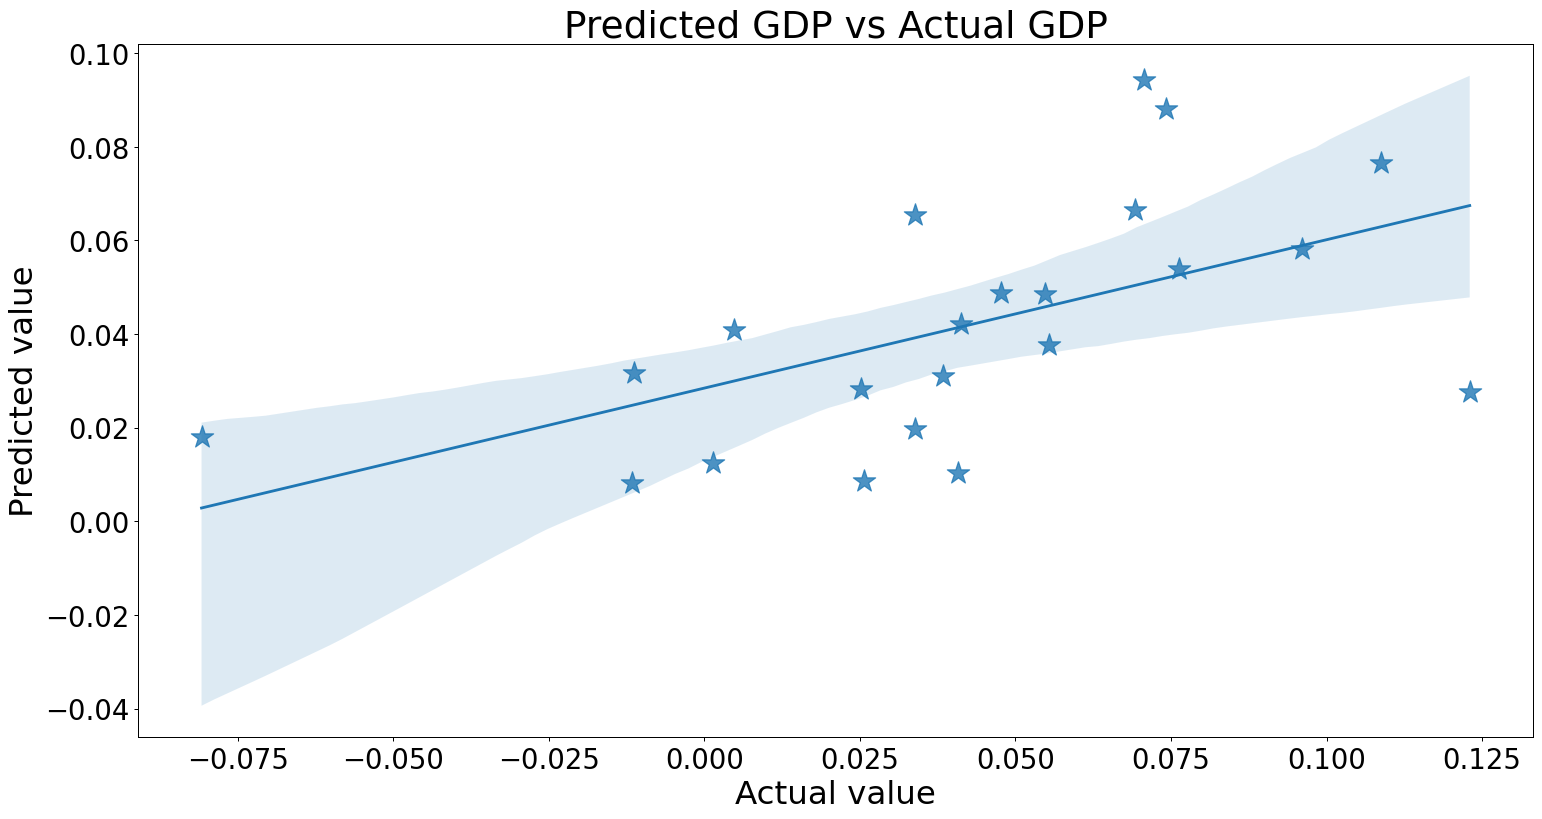

In [224]:
plt.figure(num=3, figsize=(20, 10), dpi=90, facecolor='w', edgecolor='aqua')

sns.regplot(x=y, y=p, data=df, marker='*', scatter_kws={"s": 350})

SIZE2=20  
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels


plt.title('Predicted GDP vs Actual GDP', size=30)
plt.xlabel('Actual value', size=26)
plt.ylabel('Predicted value', size=26)
plt.show()

In [225]:
Errors=(y-p)

print(Errors)

Year
2002   -0.019979
2003    0.017146
2004    0.030452
2005   -0.011139
2006    0.014061
2007   -0.003195
2008   -0.001101
2009    0.007302
2010   -0.043083
2011    0.017692
2012   -0.036153
2013   -0.000954
2014    0.006107
2015    0.022364
2016    0.038029
2017   -0.031547
2018    0.032147
2019   -0.013801
2020   -0.023592
2021   -0.098842
2022    0.095373
2023    0.002711
Name: GDP, dtype: float64


/var/folders/jy/7cv65s915dn3vt3v0kbn97q80000gn/T/ipykernel_1409/1179801972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Errors, bins=10, kde=True)


<Axes: xlabel='GDP', ylabel='Density'>

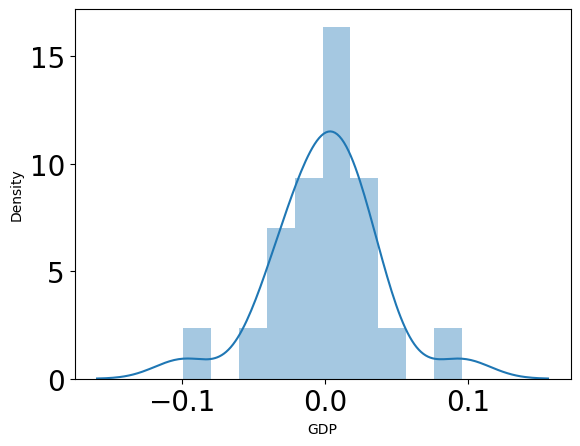

In [226]:
sns.distplot(Errors, bins=10, kde=True)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print ('Fit a model X_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with x_test, Y_test:', np.mean((y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.0005801169898011053
Fit a model X_train, and calculate MSE with x_test, Y_test: 0.002066848634261766


In [228]:
residuals = y_train - lm.predict(X_train) 

/var/folders/jy/7cv65s915dn3vt3v0kbn97q80000gn/T/ipykernel_1409/885427777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10, kde=True)


<Axes: xlabel='GDP', ylabel='Density'>

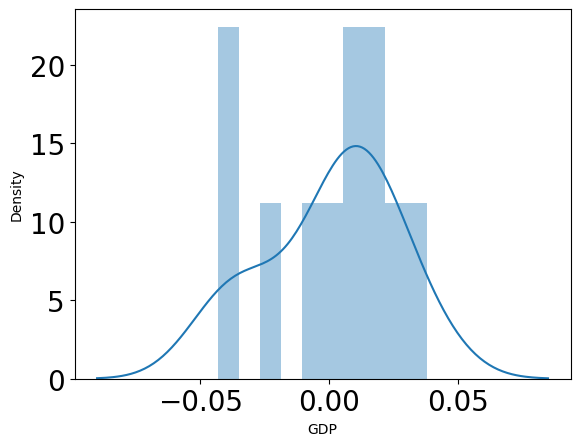

In [229]:
sns.distplot(residuals, bins=10, kde=True)

In [230]:
residuals_2 = y_test - lm.predict(X_test)

/var/folders/jy/7cv65s915dn3vt3v0kbn97q80000gn/T/ipykernel_1409/1843465965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_2, bins=10, kde=True)


<Axes: xlabel='GDP', ylabel='Density'>

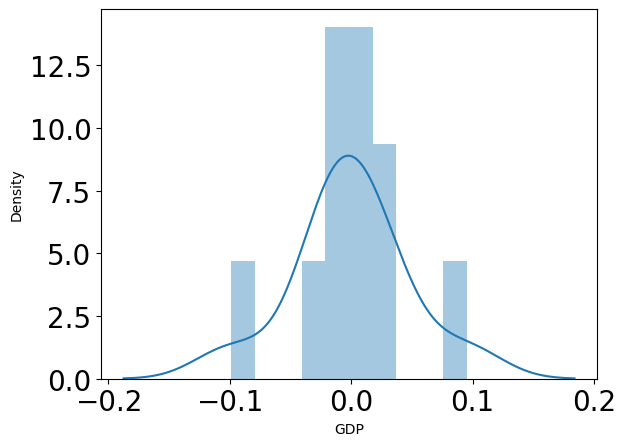

In [231]:
sns.distplot(residuals_2, bins=10, kde=True)